# Trabalho de Sistemas Inteligentes para a Bioinformática

### **Desafio**: Dream Challenge
### **Objetivo**: Utilizar uma combinação de dados microbiológicos e clínicos para avaliar o potencial da informação microbiológica do trato intestinal para previsões de risco sobre factores de risco convencionais numa grande população humana, através da construção de modelos de ML e DL.

#### Trabalho realizado por:
* [Alexandre Areias, PG45962](https://github.com/areias03)
* [Rodrigo Ribeiro, PG45969](https://github.com/Rodrigo-Ribeiro26)
* [Rúben Silva, PG44580](https://github.com/RubenPTFCP)
* [Tiago Oliveira, PG45476](https://github.com/Malavita02)

## Introdução:
Neste trabalho para a unidade curricular de Sistemas Inteligentes para a Bioinforática tivemos a oportunidade de aplicar os conceitos lecionados nas aulas. Para iniciar este trabalho tivemos de nos inscrever no site onde se encontrava o desafio (https://www.synapse.org/#!Synapse:syn27130803/wiki/619274) de modo a obtermos os datasets. Foram disponiblizados 3 datasets para exploração, estando estes divididos em treino e teste. Acabamos por não participar no desafio do site porque não conseguimos concluir o trabalho no tempo estipulado.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import Image
from sklearn import linear_model, svm
from sklearn.metrics import recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, f1_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings('ignore')

## Exploração inicial dos datasets em estudo

## Pheno dataset

### Descrição: 

#### Dados relativos aos dados clínicos de pacientes com acompanhamento de 15 anos.

### Features
* SampleID: ID dos pacientes
* Age: Idade (int)
* Sex: Sexo dos indivíduos (int: Homem=1, Mulher=0)
* BodyMassIndex: Índice de Massa Corporal (IMC) (numeric)
* Smoking: Fumador ou não fumador (int: sim=1, não=0)
* BPTreatment: Tratamento para hipertensão (int: sim=1, não=0)
* PrevalentDiabetes: Diabético ou não (int: sim=1, não=0)
* PrevalentCHD: Doenças cardíacas coronárias (int: sim=1, não=0)
* **PrevalentHFAIL**: Doenças de falha cardíaca (int: sim=1, não=0)
* Event: Incidente de falha cardíaca (int: sim=1, não=0)
* Event_time: Tempo desde início até falha cardíaca (numeric)

### pheno_training.csv e pheno_test.csv


In [3]:
# Carregar os datasets
pheno_train = pd.read_csv("train/pheno_training.csv")
pheno_test = pd.read_csv("test/pheno_test.csv")
pheno_train

,Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
0,Simulated_328,53.618,24.127,0.0,0,0.0,0.0,0.0,0.0,15.750,133.077,3.020,0
1,Simulated_1644,36.811,27.992,0.0,0,0.0,0.0,0.0,0.0,15.881,108.914,5.480,0
2,Simulated_1710,49.429,23.664,0.0,0,0.0,0.0,0.0,0.0,15.891,110.064,4.388,1
3,Simulated_1732,48.842,26.804,0.0,0,0.0,0.0,0.0,0.0,15.918,128.059,5.119,0
4,Simulated_1727,60.738,29.862,0.0,0,0.0,0.0,0.0,0.0,15.841,169.913,5.740,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,Simulated_1783,33.802,37.049,0.0,0,0.0,0.0,0.0,0.0,15.942,109.080,3.141,0
3611,Simulated_3425,69.249,36.800,0.0,0,1.0,0.0,0.0,0.0,15.781,145.953,5.478,1
3612,Simulated_1789,28.561,26.463,0.0,0,0.0,0.0,0.0,0.0,12.198,124.091,4.870,1
3613,Simulated_1592,70.278,31.945,0.0,1,0.0,0.0,0.0,0.0,15.609,142.038,2.492,0


In [3]:
pheno_train.dtypes

Unnamed: 0            object
Age                  float64
BodyMassIndex        float64
Smoking              float64
BPTreatment            int64
PrevalentDiabetes    float64
PrevalentCHD         float64
PrevalentHFAIL       float64
Event                float64
Event_time           float64
SystolicBP           float64
NonHDLcholesterol    float64
Sex                    int64
dtype: object

In [4]:
pheno_train.describe()

,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
count,3615.000000,3614.000000,3599.000000,3615.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3615.000000,3608.000000,3615.000000
mean,49.504423,27.071102,0.232842,0.155463,0.061728,0.032828,0.026094,0.084175,13.756255,136.341473,4.086256,0.443707
std,14.848086,4.724096,0.422701,0.362396,0.240695,0.178212,0.159438,0.277689,5.686619,22.037649,1.092486,0.496890
min,24.098000,15.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.709000,88.097000,1.558000,0.000000
25%,36.808500,23.774250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.740000,120.019500,3.336000,0.000000
50%,50.909000,26.402000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.820000,132.962000,3.990000,0.000000
75%,61.759000,29.499750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.881000,149.061500,4.721000,1.000000
max,74.242000,56.935000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,253.075000,12.988000,1.000000


Como se pode ver no gráfico abaixo os pacientes tinham idades compreendidas entre os 24 e 74 anos, sendo a média das idades de 49 anos.

Text(0, 0.5, 'Frequência')

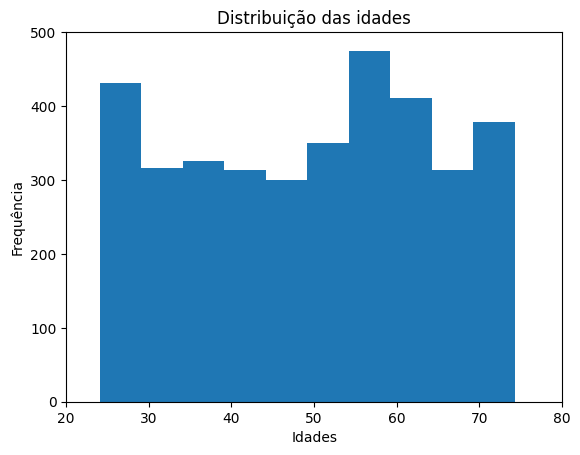

In [5]:
plt.hist(pheno_train["Age"])
plt.axis([20, 80, 0, 500])
plt.title("Distribuição das idades")
plt.xlabel("Idades")
plt.ylabel("Frequência")

Também podemos observar que a maioria dos pacientes tinham excesso de peso. (IMC > 25)

Text(0, 0.5, 'Frequência')

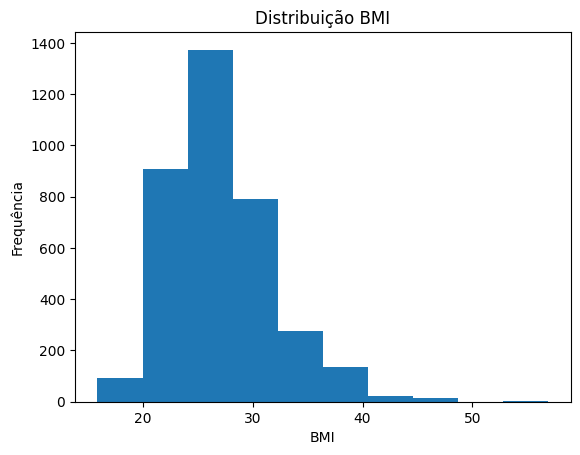

In [6]:
plt.hist(pheno_train["BodyMassIndex"])
plt.title("Distribuição BMI")
plt.xlabel("BMI")
plt.ylabel("Frequência")

<function matplotlib.pyplot.show(close=None, block=None)>

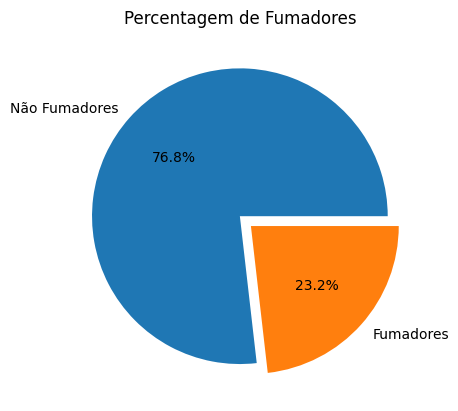

In [7]:
perc_smoking = pd.Series.value_counts(pheno_train["Smoking"] == 1) / pheno_train.Smoking.size *100
plt.pie(perc_smoking, labels= ["Não Fumadores", "Fumadores"], autopct= '%1.1f%%', explode= (0,0.1))
plt.title("Percentagem de Fumadores")
plt.show

<Figure size 1000x600 with 0 Axes>

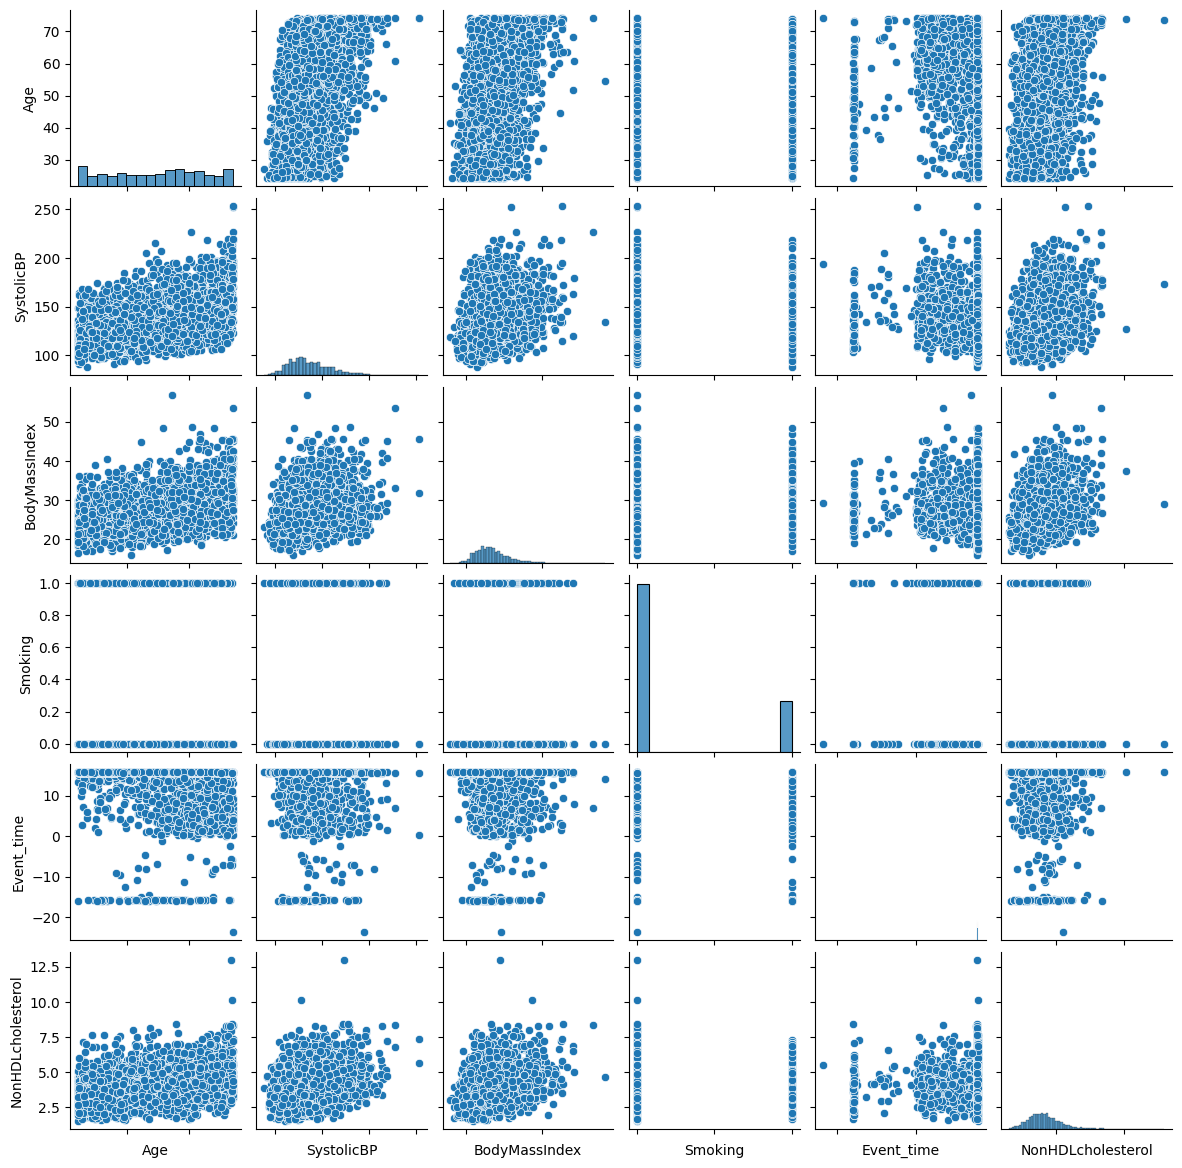

In [8]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(pheno_train[['Age','SystolicBP','BodyMassIndex','Smoking','Event_time','NonHDLcholesterol']]
                 ,height=2)
g.set(xticklabels=[])

## Pré processamento dos dados
Primeiro, decidimos confirmar a presença de valores nulos no dataset. Os valores nulos são NAs e não faz sentido os pacientes com este tipo de valores estarem no dataset. Tínhamos 279 valores nulos (1 ou mais por paciente), e através do método dropna, removemos 75 pacientes.
De seguida, definimos o nosso alvo. No caso deste dataset, o nosso alvo serão os pacientes que tiveram enfarte antes ou durante o estudo conduzido. Os pacientes que tiveram enfarte antes possuem o valor de 1 na label PrevalentHFAIL enquanto que os que tiveram enfarte durante o estudo possuem o valor de 1 na label Event. Utilizamos o método map para tornar as variáveis binárias, pois alguns dos pacientes tinham tido mais que um enfarte, portanto possuíam o valor de 2. Como o que nos interessa é a ocorrência do enfarte e não a quantidade ou repetição dessa mesma ocorrência, transformarmos os dados.
Por fim, retiramos estas labels pois são dados que não pretendemos treinar nem testar.

In [4]:
# Confirmar se tem valores nulos
print(f"Número de valores nulos: {pheno_train.isna().sum().sum()}")
n_ant, c = pheno_train.shape

# Remover pacientes com valores nulos
pheno_train = pheno_train.dropna()
pheno_test = pheno_test.dropna()

n_dep, c = pheno_train.shape
print(f"Nr. de pacientes removidos: {n_ant-n_dep}")

# Definir os dados alvo (data target - y) -> Pacientes que tiveram enfarte antes ou durante o estudo
pheno_train_y = pheno_train.PrevalentHFAIL + pheno_train.Event 
pheno_train_y = pheno_train_y.map({2: 1, 0: 0, 1: 1}) # tornar as variaveis boleanos
pheno_test_y = pheno_test.PrevalentHFAIL + pheno_test.Event 
pheno_test_y = pheno_test_y.map({2: 1, 0: 0, 1: 1}) 

# Retirar features desnecessárias para o dataset de treino
pheno_train_X = pheno_train.drop(columns = ["Unnamed: 0","Event", "Event_time", "PrevalentHFAIL"]) 
pheno_test_X = pheno_test.drop(columns = ["Unnamed: 0","Event", "Event_time", "PrevalentHFAIL"]) 

Número de valores nulos: 279
Nr. de pacientes removidos: 75


De forma a balancearmos o dataset, utilizamos um algoritmo chamado SMOTE, que cria amostras sintéticas da classe em minoria, de forma a dar oversampling desta minoria. Este algoritmo ajuda a melhorar a performance dos modelos e a reduzir o overfitting.
Como podem ver, passamos de um dataset desbalanceado, com 3157 valores 0 e 383 valores 1, para um dataset com o mesmo número de 0 e 1.

In [5]:
# SMOTE -> Synthetic Minority Over-sampling Technique
print('Original dataset shape %s' % Counter(pheno_train_y))
sm = SMOTE(random_state=42)
pheno_train_X, pheno_train_y = sm.fit_resample(pheno_train_X, pheno_train_y)
print('Resampled dataset shape %s' % Counter(pheno_train_y))

Original dataset shape Counter({0: 3157, 1: 383})
Resampled dataset shape Counter({0: 3157, 1: 3157})


Por fim, foi necessário fazer a standardização do dataset de treino, de forma a melhorar a eficiência da utilização dos modelos lineares. Para isso usamos o StandardScaler, que remove a média e dá scale aos dados para unidade de variância.

In [6]:
scaler = StandardScaler()
pheno_train_X = scaler.fit_transform(pheno_train_X)
pheno_test_X = scaler.transform(pheno_test_X)

# Machine learning - pheno dataset

### Unsupervised learning - PCA
Utilizamos o metodo PCA de aprendizagem não supervisionada para visualizar a variância dos dados.

[0.2476564  0.11971847]


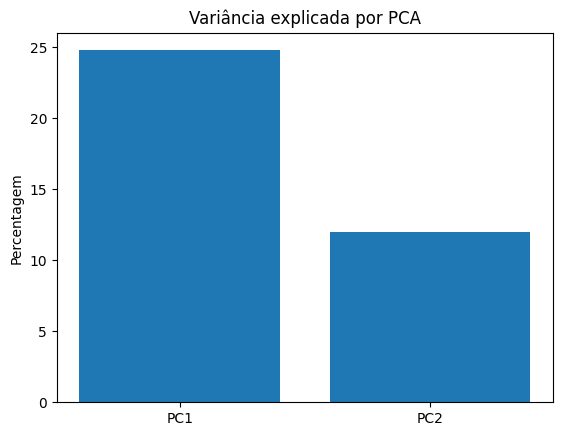

In [7]:
n=2
pca_pheno = PCA(n_components=n)
pca_pheno.fit(pheno_train_X)
x_reduced = pca_pheno.transform(pheno_train_X)


print(pca_pheno.explained_variance_ratio_)  
plt.bar(range(n), pca_pheno.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PCA")
plt.ylabel("Percentagem")
plt.show()

## Supervised learning models
Nesta etapa do trabalho treinamos este dataset com vários modelos do scikit-learn, tanto modelos de regressão como de classificação, visto que o nosso data target são valores binários.
A métrica que utilizamos para avaliar os modelos foi o recall score, porque pertendemos minimizar os falsos negativos, por se tratar de previsão para enfartes. Para esse efeito, procuramos valores de recall o mais próximo possível de 1.
O modelo com melhores resultados para este dataset foi o LogisticRegression com um valor de recall de 0.44.

##### Logistic Regression

Recall score: 0.4406779661016949
Precision score: 0.121875


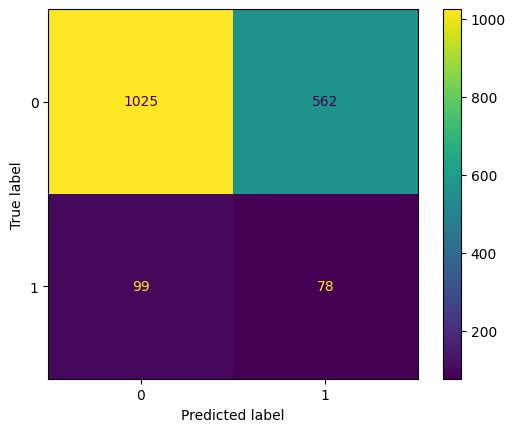

In [13]:
logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(pheno_train_X, pheno_train_y)
logistic_prev = logistic.predict(pheno_test_X)
print("Recall score:", recall_score(pheno_test_y, logistic_prev))
print("Precision score:", precision_score(pheno_test_y, logistic_prev))

cm_logreg = confusion_matrix(pheno_test_y, logistic_prev, labels=logistic.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logistic.classes_)
disp1.plot()
plt.show()

##### SVM's

Recall score:  0.3898305084745763
Precision score:  0.1259124087591241


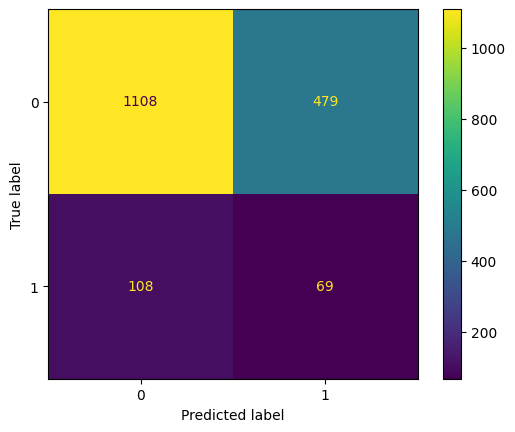

In [14]:
SVM = svm.SVC(gamma=0.001, C=100.)
SVM = SVM.fit(pheno_train_X, pheno_train_y)
svm_pred = SVM.predict(pheno_test_X)
print("Recall score: ", recall_score(pheno_test_y, svm_pred))
print("Precision score: ", precision_score(pheno_test_y, svm_pred))


cm_svm = confusion_matrix(pheno_test_y, svm_pred, labels=SVM.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=SVM.classes_)
disp_svm.plot()
plt.show()

##### KNeighborsClassifier

Recall score:  0.4293785310734463
Precision score:  0.14671814671814673


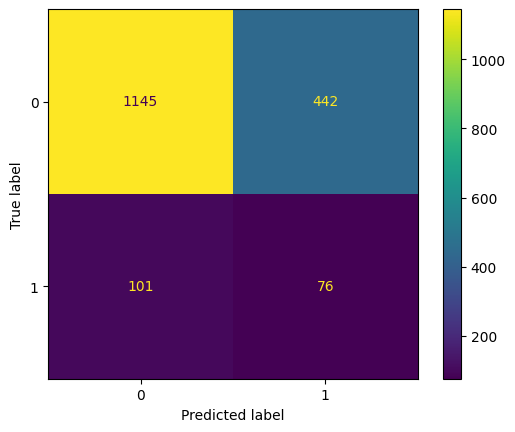

In [15]:
knn = KNeighborsClassifier()
knn.fit(pheno_train_X, pheno_train_y)
knn_pred = knn.predict(pheno_test_X)
print("Recall score: ", recall_score(pheno_test_y, knn_pred))
print("Precision score: ", precision_score(pheno_test_y, knn_pred))


cm_knn = confusion_matrix(pheno_test_y, knn_pred, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot()
plt.show()

### Random Forest Classifier

In [16]:
# AUX
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


rf_model = RandomForestClassifier(n_estimators=100)
param_dist = {"max_depth": [2, 3, None], "max_features": [2,4,6], "min_samples_split": [2,4,6],
              "min_samples_leaf": [2,4,6], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}

rand_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv = 5, scoring = "recall")
rand_search =rand_search.fit(pheno_train_X, pheno_train_y)
print (rand_search.best_estimator_)
report(rand_search.cv_results_)
print(rand_search.score(pheno_test_X, pheno_test_y))

RandomForestClassifier(max_features=4, min_samples_leaf=2, min_samples_split=4)
Model with rank: 1
Mean validation score: 0.866 (std: 0.122)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.863 (std: 0.116)
Parameters: {'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 4, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.856 (std: 0.115)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 6, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}

0.1864406779661017


Recall score:  0.14124293785310735
precision score:  0.13020833333333334


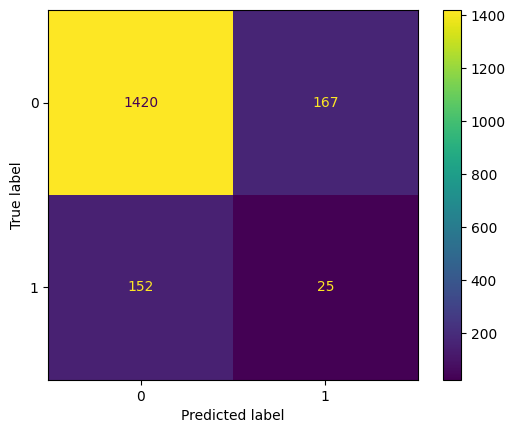

In [17]:
rf_model_best = rand_search.best_estimator_
rf_model_best.fit(pheno_train_X, pheno_train_y)
rf_pred = rf_model_best.predict(pheno_test_X)

print("Recall score: ", recall_score(pheno_test_y, rf_pred))
print("precision score: ", precision_score(pheno_test_y, rf_pred))


cm_rf = confusion_matrix(pheno_test_y, rf_pred, labels = rf_model_best.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels = rf_model_best.classes_)
disp_rf.plot()
plt.show()

### Deeplearning - MLPClassifier
O deeplearning é mais utilizado em datasets com maior quantidade e diversidade de dados, por isso não exploramos muito esta componente.
Na célula abaixo utilizamos o MPLClassifier e obtivemos uma percentagem de acerto de 78 %. 

In [18]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50, 20))
scores = cross_val_score(mlp, pheno_train_X, pheno_train_y, cv = 5)
print(scores.mean())

0.7858794684253652


## Readcounts dataset

### **Descrição**:
#### Este dataset apresenta a contagem de microorganismos do trato intestinal encontrados nos pacientes através da recolha de informação microbiana em fezes e contagem feita por *Shotgun Metagenomic Sequencing*. 

#### **Colunas**: ID dos pacientes
#### **Linhas**: Taxonomia dos microrganismos

In [8]:
# Carregar os datasets
readcounts_train = pd.read_csv("train/readcounts_training.csv")
readcounts_test = pd.read_csv("test/readcounts_test.csv")
readcounts_train

,Unnamed: 0,Simulated_328,Simulated_1644,Simulated_1710,Simulated_1732,Simulated_1727,Simulated_2196,Simulated_1681,Simulated_1651,Simulated_1603,...,Simulated_1676,Simulated_1630,Simulated_1605,Simulated_2202,Simulated_1682,Simulated_1783,Simulated_3425,Simulated_1789,Simulated_1592,Simulated_1731
0,k__Archaea;p__;c__;o__;f__;g__;s__,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,k__Viruses;p__unclassified_bacterial_viruses;c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5744,k__Viruses;p__unclassified_viruses;c__Leptopil...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5745,k__Viruses;p__unclassified_viruses;c__Mollivir...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5746,k__Viruses;p__unclassified_viruses;c__Smacovir...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
readcounts_train.describe()

,Simulated_328,Simulated_1644,Simulated_1710,Simulated_1732,Simulated_1727,Simulated_2196,Simulated_1681,Simulated_1651,Simulated_1603,Simulated_1601,...,Simulated_1676,Simulated_1630,Simulated_1605,Simulated_2202,Simulated_1682,Simulated_1783,Simulated_3425,Simulated_1789,Simulated_1592,Simulated_1731
count,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,...,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000
mean,187.729819,201.291232,129.467989,273.373695,116.749130,132.382220,55.174843,87.517223,468.192241,134.719555,...,252.920320,132.893528,175.411447,99.843598,223.180237,397.058107,108.615518,50.392484,57.360473,294.581072
std,4045.491449,7845.598753,4853.530742,5765.579549,1893.994589,1971.111151,1275.434827,1724.518096,9934.202419,1786.720767,...,3938.186685,1983.863116,2897.488989,1834.970422,8178.721692,7679.973955,1542.724800,1129.104995,1121.717643,5056.226468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000
max,276290.000000,469820.000000,359562.000000,279370.000000,98275.000000,79766.000000,73865.000000,77094.000000,569000.000000,64523.000000,...,141863.000000,84802.000000,93681.000000,98023.000000,602477.000000,398096.000000,72741.000000,73522.000000,62928.000000,245420.000000


In [21]:
readcounts_train["Unnamed: 0"]

0                      k__Archaea;p__;c__;o__;f__;g__;s__
1       k__Archaea;p__Candidatus_Korarchaeota;c__;o__;...
2       k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...
3       k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...
4       k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...
                              ...                        
5743    k__Viruses;p__unclassified_bacterial_viruses;c...
5744    k__Viruses;p__unclassified_viruses;c__Leptopil...
5745    k__Viruses;p__unclassified_viruses;c__Mollivir...
5746    k__Viruses;p__unclassified_viruses;c__Smacovir...
5747    k__Viruses;p__unclassified_viruses;c__Torulasp...
Name: Unnamed: 0, Length: 5748, dtype: object

### Unsupervised learning
Para este dataset utilizamos a aprendizagem não supervisionada para tentar encontrar alguma correlação dos valores de expressão mais altos com os domínios dos organismos.

In [9]:
# Importar a tabela taxonomica das bacterias
taxtable_train = pd.read_csv("train/taxtable.csv") 

# Criar variaves com os diferentes dominios
archaea = taxtable_train["Domain"] == "k__Archaea"
archaea = taxtable_train[archaea].index
archaeaPlasmid = taxtable_train["Domain"] == "k__ArchaeaPlasmid"
archaeaPlasmid = taxtable_train[archaeaPlasmid].index
bacteria = taxtable_train["Domain"] == "k__Bacteria"
bacteria = taxtable_train[bacteria].index
bacteriaPlasmid = taxtable_train["Domain"] == "k__BacteriaPlasmid"
bacteriaPlasmid = taxtable_train[bacteriaPlasmid].index
viruses = taxtable_train["Domain"] == "k__Viruses"
viruses = taxtable_train[viruses].index
print(archaea)
print(archaeaPlasmid)
print(bacteria)
print(bacteriaPlasmid)
print(viruses)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            251, 252, 253, 254, 255, 256, 257, 258, 259, 260],
           dtype='int64', length=261)
Int64Index([261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
            274, 275, 276],
           dtype='int64')
Int64Index([ 277,  278,  279,  280,  281,  282,  283,  284,  285,  286,
            ...
            5291, 5292, 5293, 5294, 5295, 5296, 5297, 5298, 5299, 5300],
           dtype='int64', length=5024)
Int64Index([5301, 5302, 5303, 5304, 5305, 5306, 5307, 5308, 5309, 5310,
            ...
            5643, 5644, 5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652],
           dtype='int64', length=352)
Int64Index([5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663,
            5664, 5665, 5666, 5667, 5668, 5669, 5670, 5671, 5672, 5673, 5674,
            5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685,
            5686, 5687, 5688, 5689, 5690, 5691, 5692, 569

### PCA
Não foi possivel observar nenhuma correlação relevante para o desenvolvimento do nosso trabalho

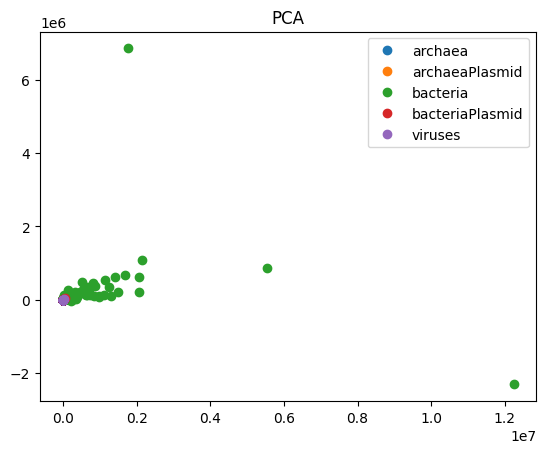

In [10]:
# dropar os nomes das bacterias
readcounts_train = readcounts_train.drop(columns = ["Unnamed: 0"])
# PCA
pca = PCA(n_components=0.8)
pca.fit(readcounts_train)
x_reduced = pca.transform(readcounts_train)

# Criar grafico e legendas
domains = [archaea, archaeaPlasmid, bacteria, bacteriaPlasmid, viruses]
for domain in domains:
    if domain is archaea:
        domain_name = "archaea"
    if domain is archaeaPlasmid:
        domain_name = "archaeaPlasmid"
    if domain is bacteria:
        domain_name = "bacteria"
    if domain is bacteriaPlasmid:
        domain_name = "bacteriaPlasmid"
    if domain is viruses:
        domain_name = "viruses"
    sp = domain-1
    plt.plot(x_reduced[sp,0],x_reduced[sp,1], 'o' , label=domain_name)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

### Pré processamento dos dados
Processo idêntico ao utilizado para o dataset anterior, com a particularidade que removemos os mesmos pacientes removidos no dataset anterior, visto que este não apresentava valores nulos.

In [81]:
# Voltar a carregar o dataset
readcounts_train = pd.read_csv("train/readcounts_training.csv")

# Obter os indexes das linhas que têm valores nulos nos dados alvo
inds_train = pheno_train.dropna().index
inds_test = pheno_test.dropna().index

# Vamos utilizar a transposta do dataset original para melhor compatibiliade
readcounts_train_X = readcounts_train.iloc[:, 1:].T # tranpose dataset for compablility
readcounts_test_X = readcounts_test.iloc[:, 1:].T # tranpose dataset for compablility

# Renomear as colunas para ter acesso facilitado e melhor organização
readcounts_train_X.columns = list(readcounts_train["Unnamed: 0"])
readcounts_test_X.columns = list(readcounts_test["Unnamed: 0"])

# Passar a utilizar apenas as linhas que foram utilizadas no outro dataset
readcounts_train_X = readcounts_train_X.iloc[inds_train]
readcounts_test_X = readcounts_test_X.iloc[inds_test]

# Reload do pheno_train
pheno_train_y = pheno_train.PrevalentHFAIL + pheno_train.Event 
pheno_train_y = pheno_train_y.map({2: 1, 0: 0, 1: 1}) # tornar as variaveis boleanos
pheno_test_y = pheno_test.PrevalentHFAIL + pheno_test.Event 
pheno_test_y = pheno_test_y.map({2: 1, 0: 0, 1: 1}) 

Os dados estão desbalanceados por isso aplicamos o SMOTE

In [82]:
# SMOTE -> Synthetic Minority Over-sampling Technique
print('Original dataset shape %s' % Counter(pheno_train_y))
sm = SMOTE(random_state=42)
readcounts_train_X, pheno_train_y = sm.fit_resample(readcounts_train_X, pheno_train_y)
print('Resampled dataset shape %s' % Counter(pheno_train_y))

Original dataset shape Counter({0: 3157, 1: 383})
Resampled dataset shape Counter({0: 3157, 1: 3157})


### Feature Selecting
Como este dataset tinha muitas features (5748) e a maioria tinha apenas valores 0, tornava os modelos muito pouco eficientes. Por estes motivos decidimos diminuir o número de features utilizando o SelectPercentile e passamos a usar as melhores 8% das features. 

In [83]:
# Select percentile
X = readcounts_train_X
y = pheno_train_y
selection = SelectPercentile(chi2, percentile=8)
X_new = selection.fit_transform(X,y)
feature_names = selection.get_feature_names_out()
print(len(feature_names))

460


### Dataset com as features selecionadas

In [84]:
# Utilizou-se 8 % das melhores features
readcounts_train_selected = readcounts_train_X[feature_names]
readcounts_test_selected = readcounts_test_X[feature_names]

Standardização dos dados de treino

In [85]:
scaler = StandardScaler()
readcounts_train_X = scaler.fit_transform(readcounts_train_selected)
readcounts_test_X = scaler.transform(readcounts_test_selected)

## Machine learning

### Supervised learning models
Mais uma vez utilizamos o recall para avaliar os resultados, sendo que desta vez o melhor foi o SVM. (não testamos muitos modelos por este ter piores resultados que o dataset pheno)

#### Logistic Regression

Recall score: 0.2655367231638418
Precision score: 0.09552845528455285


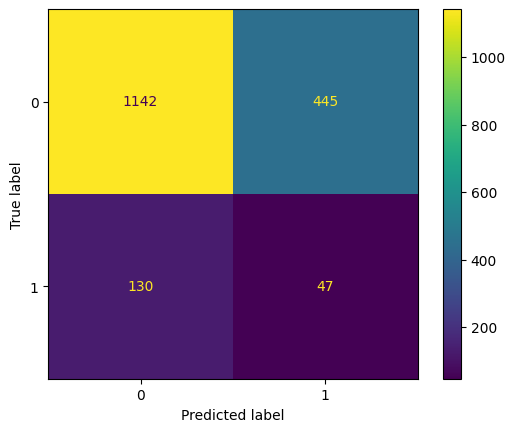

In [53]:
# Logistic regression para testar com as features selecionadas
logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(readcounts_train_selected, pheno_train_y)
logistic_prev = logistic.predict(readcounts_test_selected)

print("Recall score:", recall_score(pheno_test_y, logistic_prev))
print("Precision score:", precision_score(pheno_test_y, logistic_prev))

cm_log = confusion_matrix(pheno_test_y, logistic_prev, labels = logistic.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels = logistic.classes_)
disp_log.plot()
plt.show()

#### SVM

Recall score: 0.3502824858757062
Precision score: 0.11071428571428571


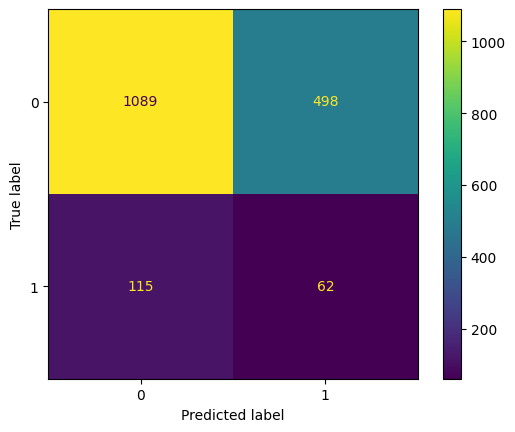

In [54]:
SVM = svm.SVC(gamma="scale", C=100.)
SVM = SVM.fit(readcounts_train_selected, pheno_train_y)
svm_pred = SVM.predict(readcounts_test_selected)

print("Recall score:", recall_score(pheno_test_y, svm_pred))
print("Precision score:", precision_score(pheno_test_y, svm_pred))


cm_svm = confusion_matrix(pheno_test_y, svm_pred, labels = SVM.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels = SVM.classes_)
disp_svm.plot()
plt.show()

## Combinação dos datasets
O objetivo do desafio é utilizar os dados de expressão genética do microbioma intestinal (readcounts), como podemos observar nos resultados anteriores o dataset readcounts previa pior do que os dados clínicos (pheno). De modo a melhorar a utilização desses dados decidimos juntar ambos os datasets com os dados clinicos e do microbiomo intestinal para tentar ter melhores resultados.

##### Voltar a carregar ambos os datasets

In [86]:
# Carregar o dataset
pheno_train = pd.read_csv("train/pheno_training.csv")
pheno_test = pd.read_csv("test/pheno_test.csv")
# Remover os valores nulos
pheno_train = pheno_train.dropna()
pheno_test = pheno_test.dropna()
var = ["Event", "Event_time"]
pheno_train_y = pheno_train.PrevalentHFAIL + pheno_train.Event 
pheno_train_y = pheno_train_y.map({2: 1, 0: 0, 1: 1}) 
pheno_train_X = pheno_train.iloc[: , 1:] 
pheno_train_X = pheno_train_X.drop(columns = ["Event", "Event_time", "PrevalentHFAIL"])   
pheno_test_y = pheno_test.PrevalentHFAIL + pheno_test.Event 
pheno_test_y = pheno_test_y.map({2: 1, 0: 0, 1: 1}) 
pheno_test_X = pheno_test.iloc[: , 1:] 
pheno_test_X = pheno_test_X.drop(columns = ["Event", "Event_time", "PrevalentHFAIL"]) 

In [87]:
# Load dataset
readcounts_train = pd.read_csv("train/readcounts_training.csv")
readcounts_test = pd.read_csv("test/readcounts_test.csv")
# get indexes of the rows without nan values
inds_train = pheno_train.dropna().index
inds_test = pheno_test.dropna().index
# data structure organization - train
pheno_train_y = pheno_train_y[inds_train]
readcounts_train_X = readcounts_train.iloc[:, 1:].T # transpose dataset for compablility
readcounts_train_X.columns = list(readcounts_train["Unnamed: 0"]) # renaming columns for acessibility
readcounts_train_X = readcounts_train_X.iloc[inds_train] # using only rows without nan
# data structure organization - test
pheno_test_y = pheno_test_y[inds_test]
readcounts_test_X = readcounts_test.iloc[:, 1:].T # transpose dataset for compablility
readcounts_test_X.columns = list(readcounts_test["Unnamed: 0"]) # renaming columns for acessibility
readcounts_test_X = readcounts_test_X.iloc[inds_test] # using only rows without nan

In [88]:
# Utilizou-se 8 % das melhores features
readcounts_train_selected = readcounts_train_X[feature_names]
readcounts_test_selected = readcounts_test_X[feature_names]

# Mudar o nome das linhas para serem iguais
row_names_train = readcounts_train_selected.index
row_names_test = readcounts_test_selected.index
pheno_train_X.index = row_names_train
pheno_test_X.index = row_names_test


In [89]:
pheno_test_y.value_counts()

0    1587
1     177
dtype: int64

In [90]:
# Fusão dos datasets
new_df_train = pd.merge(pheno_train_X, readcounts_train_selected, left_index=True, right_index=True)
new_df_test = pd.merge(pheno_test_X, readcounts_test_selected, left_index=True, right_index=True)
Image(url='https://gifdb.com/images/thumbnail/fat-gogeta-fusion-dance-d6pof4c7mjdlwnr1.gif')

In [41]:
new_df_test

,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,SystolicBP,NonHDLcholesterol,Sex,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobacterium;s__Methanobacterium_sp._MB1,...,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Shigella;s__Shigella_dysenteriae,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Shigella;s__Shigella_flexneri,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea;s__Pantoea_agglomerans,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea;s__Pantoea_sp._PSNIH2,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae;g__Yersinia;s__Yersinia_pestis,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__Acinetobacter_johnsonii,k__BacteriaPlasmid;p__Spirochaetes;c__Spirochaetia;o__Spirochaetales;f__Spirochaetaceae;g__Treponema;s__Treponema_succinifaciens,"k__Viruses;p__dsDNA_viruses,_no_RNA_stage;c__Caudovirales;o__;f__;g__;s__",k__Viruses;p__ssDNA_viruses;c__Inoviridae;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Enterobacteria_phage_YYZ-2008;o__;f__;g__;s__
Simulated_2211,73.860,30.140,1.0,1,0.0,0.0,154.046,5.010,0,0,...,63,4,0,0,0,0,0,1710,0,0
Simulated_1629,48.070,18.252,1.0,0,0.0,0.0,184.064,3.922,0,0,...,1,4,0,0,0,0,0,175,0,0
Simulated_1690,49.060,25.911,0.0,0,0.0,0.0,126.922,5.119,1,0,...,0,0,0,2,0,0,0,446,0,4
Simulated_1367,58.499,25.739,0.0,0,0.0,0.0,141.003,3.890,1,0,...,0,0,0,0,0,0,0,625,0,0
Simulated_3387,47.242,29.227,0.0,0,0.0,0.0,143.021,3.611,1,0,...,0,1,0,0,0,0,0,198,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Simulated_1628,56.091,25.580,1.0,0,0.0,0.0,169.903,4.480,1,0,...,0,0,47,0,0,0,0,29,0,0
Simulated_3424,46.889,22.762,0.0,0,0.0,0.0,122.995,3.669,0,0,...,0,0,0,0,0,0,0,152,0,0
Simulated_2215,70.841,24.808,0.0,0,0.0,0.0,190.934,6.069,1,0,...,0,0,0,1,0,0,0,93,0,0
Simulated_3426,25.920,20.520,0.0,0,0.0,0.0,117.032,2.789,1,0,...,0,0,0,0,0,0,0,23,0,0


Balanceamento do dataset

In [91]:
# SMOTE -> Synthetic Minority Over-sampling Technique
print('Original dataset shape %s' % Counter(pheno_train_y))
sm = SMOTE(random_state=42)
new_df_train, pheno_train_y = sm.fit_resample(new_df_train, pheno_train_y)
print('Resampled dataset shape %s' % Counter(pheno_train_y))

Original dataset shape Counter({0: 3157, 1: 383})
Resampled dataset shape Counter({0: 3157, 1: 3157})


Standardização do dataset fusion

In [92]:
scaler = StandardScaler()
new_df_train = scaler.fit_transform(new_df_train)
new_df_test = scaler.transform(new_df_test)

### Unsupervised learning
#### PCA

[0.11310018 0.02970309]


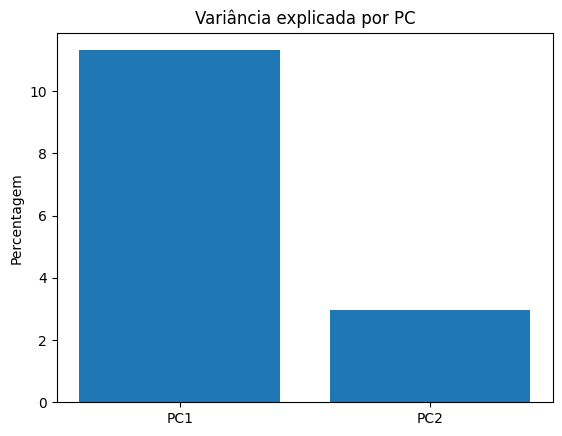

In [29]:
n=2
pca_iris = PCA(n_components=n)
pca_iris.fit(new_df_train)
x_reduced = pca_iris.transform(new_df_train)

print(pca_iris.explained_variance_ratio_)  
plt.bar(range(n), pca_iris.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

## Machine learning

A métrica que melhor reflete a eficácia dos modelos para o nosso estudo é a recall com average "weighted", porque procuramos minimizar os falsos negativos para um dataset unbalanced onde as features têm todas o mesmo peso.
Utilizámos ainda o f1_score como métrica para optimização de hiperparametros pois este é a média geométrica entre a precision e o recall.
Não utilizamos a precision porque esta é mais utilizada para minimizar os falsos positivos.

### Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt_fusion = DecisionTreeClassifier()
param_dt = {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best','random'], 'max_depth':[2,4,6,None], 'min_samples_split' : [1.0,2.0,3.0], 'min_samples_leaf':[0.0,1.0,2.0], 'min_weight_fraction_leaf': [0.0, 0.1,0.2,0.3], 'random_state': [0,1,2,3,None], 'max_leaf_nodes': [2,3,4,5,None], 'min_impurity_decrease': [0.0,0.2,0.3], 'class_weight':['balanced', None], 'ccp_alpha': [0.01,0.1,0.001]}
metrics = {'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score)}
rand_search = RandomizedSearchCV(dt_fusion, param_distributions=param_dt, n_iter=20, cv = 5, scoring=metrics, n_jobs=-1, refit='recall')
rand_search =rand_search.fit(new_df_train, pheno_train_y)
print (rand_search.best_estimator_)
print(rand_search.score(new_df_test, pheno_test_y))

DecisionTreeClassifier(ccp_alpha=0.1, class_weight='balanced', max_depth=4,
                       max_leaf_nodes=5, min_samples_leaf=2.0,
                       min_samples_split=1.0, min_weight_fraction_leaf=0.3,
                       random_state=0)
0.8996598639455783


Recall score: 0.8996598639455783


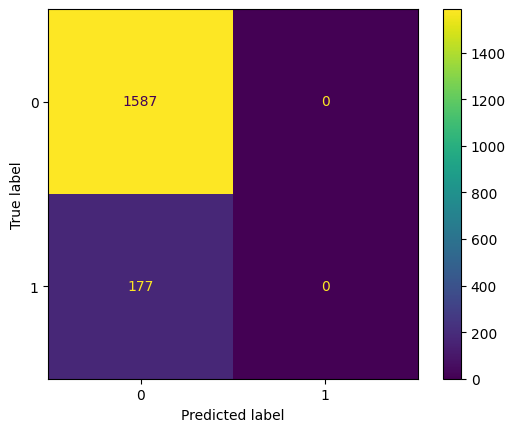

In [98]:
dt_fusion = rand_search.best_estimator_
dt_fusion = dt_fusion.fit(new_df_train, pheno_train_y)
dt_pred_fusion = dt_fusion.predict(new_df_test)

dt_fusion_recal = recall_score(pheno_test_y, dt_pred_fusion, average= "weighted")
print("Recall score:", dt_fusion_recal)

cm_log = confusion_matrix(pheno_test_y, dt_pred_fusion, labels = dt_fusion.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels = dt_fusion.classes_)
disp_log.plot()
plt.show()

#### Logistic Regression

In [99]:
logistic_fusion = linear_model.LogisticRegression()
param_dist_log = {"penalty": ["l1", "l2","elasticnet",None], "dual": [True, False], "tol": [1e-4,1e-2,1e-6],
              "C": [1e5,1.,1e3], "fit_intercept": [True, False], "intercept_scaling": [1.,3.,6.]}

metrics = {'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score)}

rand_search = RandomizedSearchCV(logistic_fusion, param_distributions=param_dist_log, n_iter=20, cv = 5, scoring= metrics, n_jobs=-1, refit='recall')
rand_search =rand_search.fit(new_df_train, pheno_train_y)
print (rand_search.best_estimator_)
print(rand_search.score(new_df_test, pheno_test_y))

LogisticRegression(intercept_scaling=6.0)
0.7346938775510204


Recall score: 0.8241871035226649


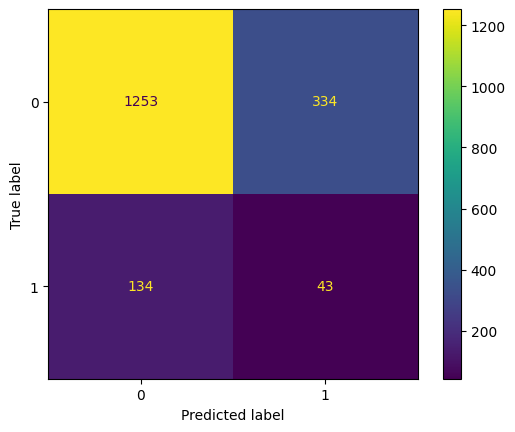

In [100]:
logistic_fusion = rand_search.best_estimator_
logistic_fusion = logistic_fusion.fit(new_df_train, pheno_train_y)
logistic_pred_fusion = logistic_fusion.predict(new_df_test)

logistic_fusion_recall = recall_score(pheno_test_y, logistic_pred_fusion, average= "weighted")
print("Recall score:", precision_score(pheno_test_y, logistic_pred_fusion, average= "weighted"))

cm_log = confusion_matrix(pheno_test_y, logistic_pred_fusion, labels = logistic_fusion.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels = logistic_fusion.classes_)
disp_log.plot()
plt.show()

### K Neighbors Classifier

In [101]:
knn_fusion = KNeighborsClassifier()
param_dist_knn = {"n_neighbors": [2,4,6],"weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], "leaf_size": [20,40,60],
              "p": [1,2]}

metrics = {'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score)}

rand_search = RandomizedSearchCV(knn_fusion, param_distributions=param_dist_knn, n_iter=20, cv = 5, scoring=metrics, n_jobs=-1, refit='recall')
rand_search =rand_search.fit(new_df_train, pheno_train_y)
print (rand_search.best_estimator_)
print(rand_search.score(new_df_test, pheno_test_y))

KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, n_neighbors=2)
0.6530612244897959


Recall score: 0.6530612244897959


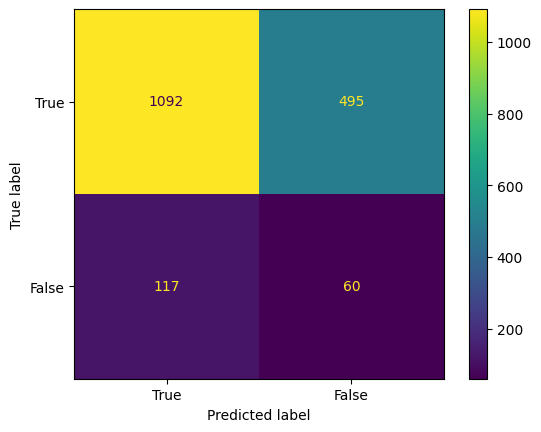

In [103]:
knn_fusion_best = rand_search.best_estimator_
knn_fusion_best.fit(new_df_train, pheno_train_y)
knn_pred_fusion = knn_fusion_best.predict(new_df_test)

knn_fusion_recall = recall_score(pheno_test_y, knn_pred_fusion, average= "weighted")
print("Recall score:", knn_fusion_recall)

cm_knn = confusion_matrix(pheno_test_y, knn_pred_fusion)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels = [True, False])
disp_knn.plot()
plt.show()

### Random Forest Classifier

In [104]:
rf_model = RandomForestClassifier(n_estimators=100)
param_dist = {"max_depth": [2, 3, None], "max_features": [2,4,6], "min_samples_split": [2,4,6],
              "min_samples_leaf": [2,4,6], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}

metrics = {'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score)}

rand_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv = 5, scoring=metrics, n_jobs=-1, refit='recall')
rand_search =rand_search.fit(new_df_train, pheno_train_y)
print (rand_search.best_estimator_)
print(rand_search.score(new_df_test, pheno_test_y))

RandomForestClassifier(bootstrap=False, max_features=4, min_samples_leaf=2,
                       min_samples_split=6)
0.8985260770975056


Recall score: 0.8985260770975056


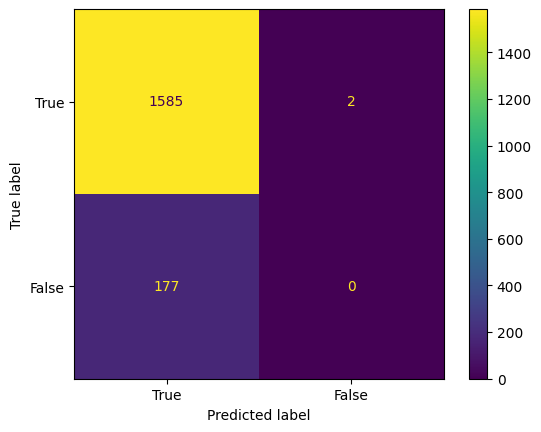

In [105]:
rf_model_best = rand_search.best_estimator_
rf_model_best = rf_model_best.fit(new_df_train, pheno_train_y)
preds_rf_model = rf_model_best.predict(new_df_test)

recall_rf_fusion = recall_score(pheno_test_y, preds_rf_model, average= "weighted") 
print("Recall score:", recall_score(pheno_test_y, preds_rf_model, average= "weighted"))

cm_rf = confusion_matrix(pheno_test_y, preds_rf_model)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels = [True, False])
disp_knn.plot()
plt.show()

### Linear Regression

In [67]:
regr_model = LinearRegression()
regr_model = regr_model.fit(new_df_train, pheno_train_y)
regr_model_pred = regr_model.predict(new_df_test)
regr_model_pred = np.round(regr_model_pred)
recall_lin_reg = recall_score(pheno_test_y, regr_model_pred, average= "weighted")
print("Recall score: ", recall_score(pheno_test_y, regr_model_pred, average= "weighted"))


Recall score:  0.6145124716553289


### Ridge 

In [108]:
ridge = linear_model.Ridge()
param_dist = {"alpha": [0.1, 0.01, 1]}

metrics = {'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score)}

rand_search = RandomizedSearchCV(ridge, param_distributions=param_dist, n_iter=20, cv = 5, scoring=metrics, n_jobs=-1, refit='recall')
rand_search =rand_search.fit(new_df_train, pheno_train_y)
print(rand_search.best_estimator_)

rid_model_best = rand_search.best_estimator_
rid_model_best = rid_model_best.fit(new_df_train, pheno_train_y)
preds_rid_model = rid_model_best.predict(new_df_test)
ridge_pred = np.round(preds_rid_model)

recall_ridge = recall_score(pheno_test_y, ridge_pred, average= "weighted")
print("Recall score: ", recall_score(pheno_test_y, ridge_pred, average= "weighted"))


Ridge(alpha=0.1)
Recall score:  0.6473922902494331


### Lasso

Lasso(alpha=0.1)
Recall score:  0.5668934240362812


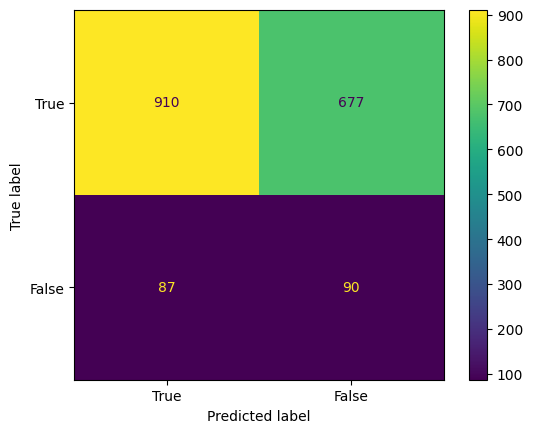

In [111]:
lasso = Lasso()
param_dist = {"alpha": [0.1, 0.01, 1], "selection" : ["cyclic", "random"]}

metrics = {'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score)}

rand_search = RandomizedSearchCV(lasso, param_distributions=param_dist, n_iter=20, cv = 5, scoring=metrics, n_jobs=-1, refit='recall')
rand_search =rand_search.fit(new_df_train, pheno_train_y)
print(rand_search.best_estimator_)

lasso_best = rand_search.best_estimator_
lasso_best = lasso_best.fit(new_df_train, pheno_train_y)
lasso_pred = lasso_best.predict(new_df_test)
lasso_pred = np.round(lasso_pred)
print("Recall score: ", recall_score(pheno_test_y, lasso_pred, average= "weighted"))
recall_lasso = recall_score(pheno_test_y, lasso_pred, average= "weighted")

cm_lasso = confusion_matrix(pheno_test_y, lasso_pred)
disp_lasso = ConfusionMatrixDisplay(confusion_matrix=cm_lasso, display_labels=[True, False])
disp_lasso.plot()
plt.show()

#### XGBoost Classifier

In [112]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100)
param_dist = {"eta": [0.01,0.2,0.3], "max_depth": [3,6,10],
              'gamma':[0.1, 0.01, 0.05, 0.001], "subsample": [0.5, 0.8, 1], "colsample_bytree": [0.5, 0.8, 1]}

metrics = {'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score)}

rand_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=20, cv = 5, scoring=metrics, n_jobs=-1, refit='recall')
rand_search =rand_search.fit(new_df_train, pheno_train_y)
print (rand_search.best_estimator_)
print(rand_search.score(new_df_test, pheno_test_y))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0.001, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)
0.8866213151927438


Recall score: 0.8866213151927438


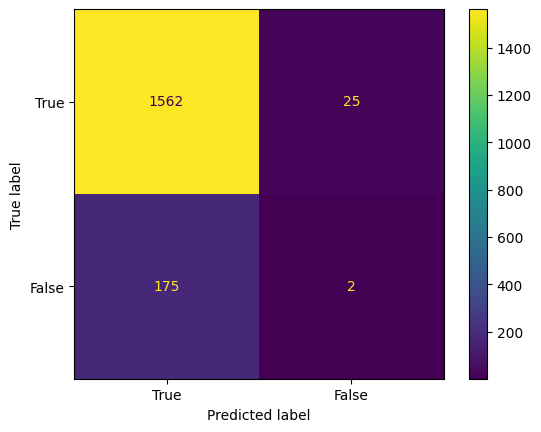

In [113]:
xgb_model_best = rand_search.best_estimator_
xgb_model_best = xgb_model_best.fit(new_df_train, pheno_train_y)
preds_xgb = xgb_model_best.predict(new_df_test)

recall_xgb = recall_score(pheno_test_y, preds_xgb, average= "weighted") 
print("Recall score:", recall_score(pheno_test_y, preds_xgb, average= "weighted"))

cm_xgb = confusion_matrix(pheno_test_y, preds_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels = [True, False])
disp_xgb.plot()
plt.show()

## Deep Learning

In [114]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50, 20))
scores = cross_val_score(mlp, new_df_train, pheno_train_y, cv = 5)
print(scores.mean())

0.9225536512190807


## Resultados

Os resultados apresentados que correspondem aos modelos que obtiveram mais de 0.5 de recall score (avg: weighted) dentro de todos os modelos treinados. 
Segundo estes resultados chegamos à conclusão de que o melhor modelo para o nosso caso de estudo é o XGBoost Classifier com um score de 0.886621.

In [116]:
scores = {"Models": ["Logistic Regression", "K Neighbors Classifier", "Lasso", "LinearRegression", "Ridge", "XGBClassifier"], 
"Recall scores": [logistic_fusion_recall, knn_fusion_recall, recall_lasso, recall_lin_reg, recall_ridge, recall_xgb]}
df = pd.DataFrame(scores)
df.sort_values(by=["Recall scores"], ascending=False)

,Models,Recall scores
5,XGBClassifier,0.886621
0,Logistic Regression,0.734694
1,K Neighbors Classifier,0.653061
4,Ridge,0.647392
3,LinearRegression,0.614512
2,Lasso,0.566893
